In [126]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from math import sqrt

In [57]:
client = str(input("Enter Client Name : "))

Enter Client Name : HSBC


In [59]:
le = str(input("Enter Legal Entity (eg. CitiBank Pune) : "))

Enter Legal Entity (eg. CitiBank Pune) : CitiBank Pune


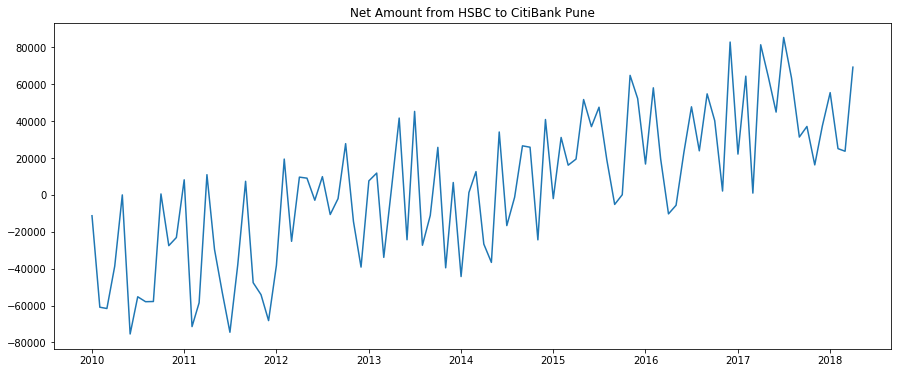

In [61]:
df = pd.read_csv(r'C:/Users/User/Desktop/TimeSeriesPrediction/dataset.csv', parse_dates = ['Date'], index_col = 'Date')
ts = df[(df['Client Name'] == client) & (df['Legal Entity'] == le)]['Net Amount']
#print(df[df['Client Name'] == 'JP Morgan'])
#print(ts)
#ts.dropna(inplace = True)
#print(len(ts))
plt.title(f'Net Amount from {client} to {le}')
plt.plot(ts)
plt.show()

Text(0.5, 1.0, 'Moving Average of the data to show the trend')

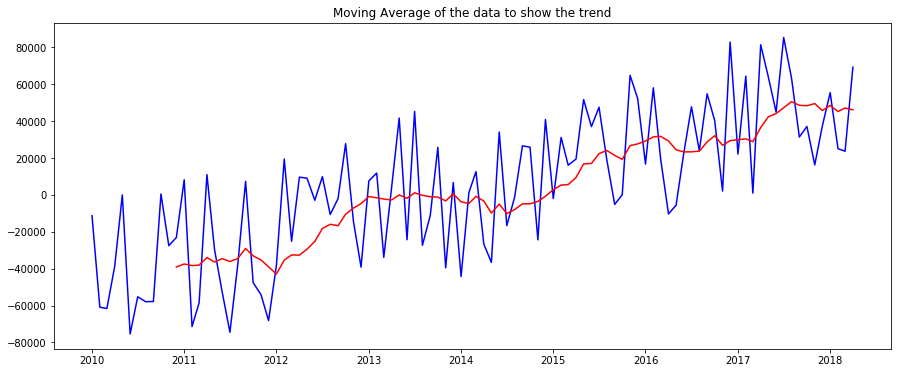

In [62]:
# Moving Average to show the trend

rolmean = ts.rolling(window=12,center=False).mean()
orig = plt.plot(ts.index.to_pydatetime(), ts.values, color='blue',label='Original')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, color='red', label='Rolling Mean')
plt.title('Moving Average of the data to show the trend')

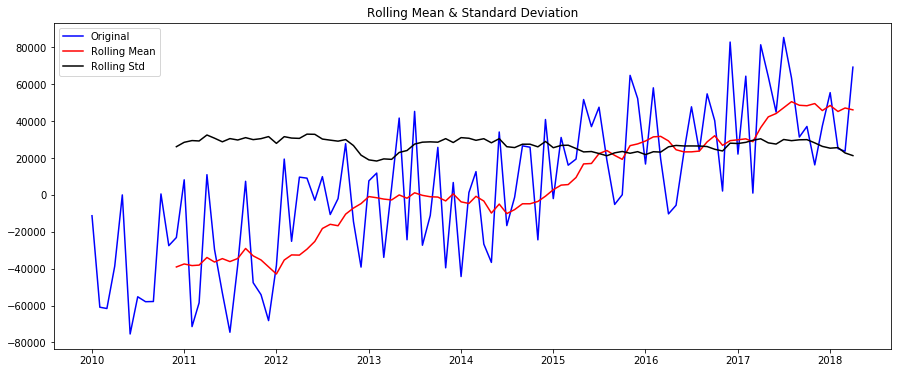

In [63]:
#Test stationarity using graphs
def test_stationarity(timeseries):
    
    timeseries.dropna(inplace = True)
    #print(len(timeseries))
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

test_stationarity(ts)

In [64]:
#Perform Dickey-Fuller test:
def df_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    pval = dfoutput['p-value']
    print(f'Result: The series is {"not " if pval > 0.05 else ""}stationary')
    
df_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -1.360785
p-value                         0.600925
#Lags Used                      4.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64
Result: The series is not stationary


In [65]:
# Perform KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')



In [66]:
kpss_test(ts)

KPSS Statistic: 0.820640729541228
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [67]:
ts_log = np.log(ts)
#deal with negative values by adding a large positive constant
ts_log = np.log(ts + 100000)
ts_log.head()
len(ts_log)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


100

In [68]:
ts_log.dropna(inplace=True)
print(len(ts_log))

100


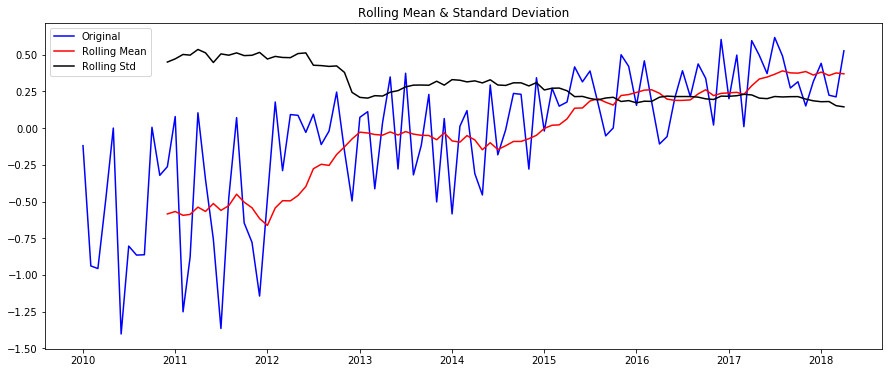

In [69]:
test_stationarity(ts_log - np.log(100000))

In [70]:
df_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                 -1.387326
p-value                         0.588337
#Lags Used                      4.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64
Result: The series is not stationary


In [72]:
# Applying differencing 
ts_log_diff = ts_log - ts_log.shift()

In [73]:
print(ts_log_diff)

Date
2010-01-01         NaN
2010-02-01   -0.818824
2010-03-01   -0.018161
2010-04-01    0.468727
2010-05-01    0.488091
2010-06-01   -1.402128
2010-07-01    0.598582
2010-08-01   -0.061433
2010-09-01    0.002419
2010-10-01    0.867755
2010-11-01   -0.326877
2010-12-01    0.058986
2011-01-01    0.341363
2011-02-01   -1.330011
2011-03-01    0.372062
2011-04-01    0.983337
2011-05-01   -0.454819
2011-06-01   -0.406780
2011-07-01   -0.607334
2011-08-01    0.888994
2011-09-01    0.547044
2011-10-01   -0.717095
2011-11-01   -0.132189
2011-12-01   -0.365767
2012-01-01    0.663005
2012-02-01    0.658391
2012-03-01   -0.467274
2012-04-01    0.381784
2012-05-01   -0.005139
2012-06-01   -0.116243
                ...   
2015-11-01    0.498562
2015-12-01   -0.079244
2016-01-01   -0.265554
2016-02-01    0.303017
2016-03-01   -0.279692
2016-04-01   -0.286614
2016-05-01    0.050646
2016-06-01    0.265389
2016-07-01    0.182935
2016-08-01   -0.176124
2016-09-01    0.222536
2016-10-01   -0.098685
2016-1

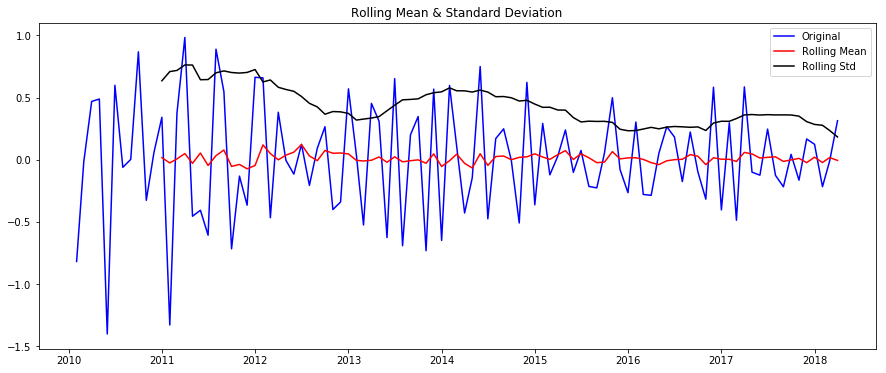

In [74]:
# test the stationarity on differenced log data
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [75]:
df_test(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                -9.889041e+00
p-value                        3.598842e-17
#Lags Used                     3.000000e+00
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64
Result: The series is stationary


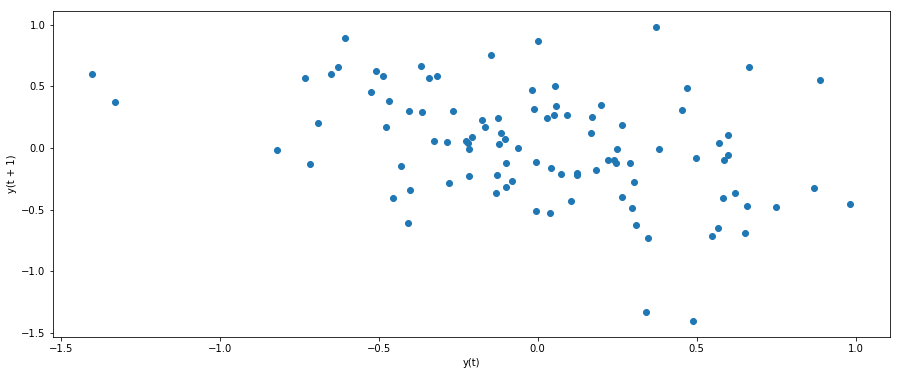

In [76]:
pd.plotting.lag_plot(ts_log_diff)
pyplot.show()

In [77]:
values = pd.DataFrame(ts_log_diff.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000 -0.405294
t+1 -0.405294  1.000000


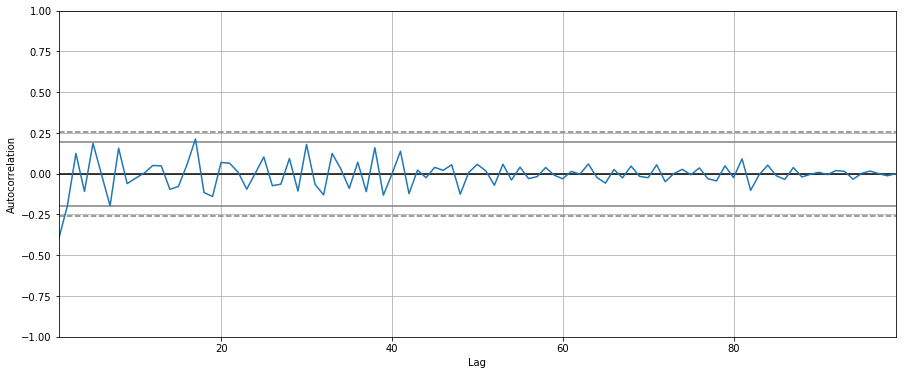

In [78]:
autocorrelation_plot(ts_log_diff)
pyplot.show()

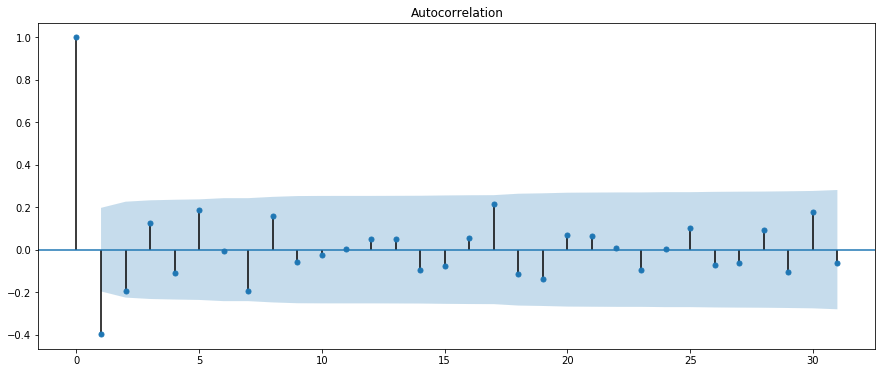

In [82]:
plot_acf(ts_log_diff, lags=31)
pyplot.show()

In [85]:
values = pd.DataFrame(ts_log_diff.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

In [86]:
print(dataframe)

         t-1       t+1
0        NaN -0.818824
1  -0.818824 -0.018161
2  -0.018161  0.468727
3   0.468727  0.488091
4   0.488091 -1.402128
5  -1.402128  0.598582
6   0.598582 -0.061433
7  -0.061433  0.002419
8   0.002419  0.867755
9   0.867755 -0.326877
10 -0.326877  0.058986
11  0.058986  0.341363
12  0.341363 -1.330011
13 -1.330011  0.372062
14  0.372062  0.983337
15  0.983337 -0.454819
16 -0.454819 -0.406780
17 -0.406780 -0.607334
18 -0.607334  0.888994
19  0.888994  0.547044
20  0.547044 -0.717095
21 -0.717095 -0.132189
22 -0.132189 -0.365767
23 -0.365767  0.663005
24  0.663005  0.658391
25  0.658391 -0.467274
26 -0.467274  0.381784
27  0.381784 -0.005139
28 -0.005139 -0.116243
29 -0.116243  0.123723
..       ...       ...
69  0.054039  0.498562
70  0.498562 -0.079244
71 -0.079244 -0.265554
72 -0.265554  0.303017
73  0.303017 -0.279692
74 -0.279692 -0.286614
75 -0.286614  0.050646
76  0.050646  0.265389
77  0.265389  0.182935
78  0.182935 -0.176124
79 -0.176124  0.222536
80  0.22253

In [107]:
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
print(test_X)

[-0.21793113  0.04279333 -0.16486529  0.16657766  0.12376903 -0.21730509
 -0.01128747]


In [94]:
def model_persistence(x):
    return x

-0.21793113199864322
0.04279333274361363
-0.16486528626037433
0.1665776591161574
0.12376903462419442
-0.21730508547015503
-0.011287473020434646
Test MSE: 0.070


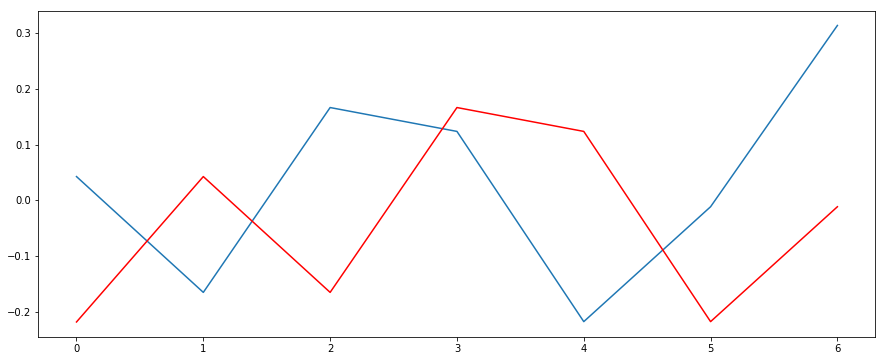

In [106]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    print(yhat)

    
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [114]:
X = ts_log_diff.values

In [115]:
train, test = X[1:len(X)-7], X[len(X)-7:]

In [131]:
model = AR(train)
model_fit = model.fit()

In [132]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [133]:
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=0.271158, expected=0.042793
predicted=-0.063373, expected=-0.164865
predicted=0.028366, expected=0.166578
predicted=-0.002450, expected=0.123769
predicted=-0.047042, expected=-0.217305
predicted=0.059235, expected=-0.011287
predicted=0.032995, expected=0.313745


In [134]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.173


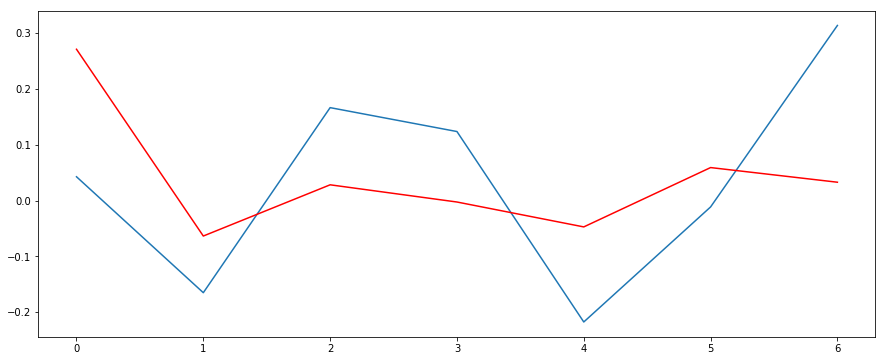

In [135]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [136]:
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 0.0630272  -0.83223068 -0.87668874 -0.65591686 -0.48702202 -0.20184095
 -0.1614929  -0.23768583 -0.22174155 -0.23319764 -0.19183046 -0.16383381
 -0.07077374]
